In [1]:
library(data.table)
library(plyr)
library(dplyr)
library(Seurat)
library(ggplot2)
library(repr)
library(stringr)



Attache Paket: 'dplyr'


Die folgenden Objekte sind maskiert von 'package:plyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Die folgenden Objekte sind maskiert von 'package:data.table':

    between, first, last


Die folgenden Objekte sind maskiert von 'package:stats':

    filter, lag


Die folgenden Objekte sind maskiert von 'package:base':

    intersect, setdiff, setequal, union


Lade n"otiges Paket: SeuratObject

Lade n"otiges Paket: sp

'SeuratObject' was built under R 4.3.1 but the current version is
4.3.2; it is recomended that you reinstall 'SeuratObject' as the ABI
for R may have changed

'SeuratObject' was built with package 'Matrix' 1.6.3 but the current
version is 1.6.4; it is recomended that you reinstall 'SeuratObject' as
the ABI for 'Matrix' may have changed


Attache Paket: 'SeuratObject'


Das folgende Objekt ist maskiert 'package:base':

    intersect




In [2]:
library(extrafont)
font_import(paths = "/Library/Fonts", prompt = FALSE)
loadfonts()
fonts()


Registering fonts with R

Scanning ttf files in /Library/Fonts ...

Extracting .afm files from .ttf files...

/System/Library/Fonts/Supplemental/Arial Unicode.ttf
 : ArialUnicodeMS already registered in fonts database. Skipping.

/Library/Fonts/FontsFree-Net-MYRIADPRO-REGULAR.ttf
 : MyriadPro-Regular already registered in fonts database. Skipping.

Found FontName for 0 fonts.

Scanning afm files in /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/library/extrafontdb/metrics

Arial Unicode MS already registered with pdfFont().

Myriad Pro already registered with pdfFont().

Arial Unicode MS already registered with postscriptFont().

Myriad Pro already registered with postscriptFont().



[1] "Arial Unicode MS" "Myriad Pro"

In [3]:
plot_theme <- function() {
    theme_bw() + theme(
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        text = element_text(size = 24, family = "Myriad Pro"),
        axis.text = element_text(size = 26),
        axis.text.x = element_text(vjust = 0.5, angle = 45),
        axis.title = element_text(size = 30),
        legend.text = element_text(size = 24),
        legend.title = element_text(size = 26),
        legend.key.size = unit(0.8, "cm"),
        plot.title = element_text(size = 30, hjust = 0.5),
        axis.line = element_line(linewidth = 0.7, colour = "black"),
        plot.margin = margin(
            t = 1,
            b = 0.1,
            r = 0.3,
            l = 0.6,
            "cm"
        )
    )
}
options(repr.plot.width = 10, repr.plot.height = 9)


In [4]:
prepare_df_for_plot <- function(assignment) {
    compare <- fread(assignment, na.strings = "")
    summary_compare <- melt(
        compare,
        id.vars = "Barcode",
        variable.name = "Dataset",
        value.name = "Assignment"
    )
    summary_compare <- na.omit(summary_compare)
    summary_compare <- as.data.frame(table(summary_compare[, -1]))
    colnames(summary_compare)[3] <- "Count"
    summary_compare <-
        summary_compare[order(summary_compare$Assignment, decreasing = T), ]
    summary_compare$Percentage <- 0
    summary_compare$Dataset <-
        gsub(" Dataset", "", summary_compare$Dataset)
    summary_compare$Dataset <-
        factor(summary_compare$Dataset, levels = c("Full", paste0("Hash45", 1:6, " Downsampled")))
    summary_compare <- summary_compare %>%
        group_by(Dataset) %>%
        mutate(Percentage = round(Count / sum(Count) * 100, 2))
    summary_compare_cumsum <-
        ddply(summary_compare,
            "Dataset",
            transform,
            label_ypos = cumsum(Percentage) - 0.5 * Percentage
        )
    summary_compare_cumsum <-
        summary_compare_cumsum[summary_compare_cumsum$Count != 0, ]
    summary_compare_cumsum
}


In [5]:
downsampled_assignment <- list.files(
    path = "../data",
    pattern = "downsampled_compare_*",
    all.files = TRUE,
    recursive = TRUE
)
downsampled_assignment


[1] "downsample_30_run1/downsampled_compare_freemuxlet_all.csv"
 [2] "downsample_30_run1/downsampled_compare_scsplit_all.csv"   
 [3] "downsample_30_run1/downsampled_compare_souporcell_all.csv"
 [4] "downsample_30_run1/downsampled_compare_vireo_all.csv"     
 [5] "downsample_30_run2/downsampled_compare_freemuxlet_all.csv"
 [6] "downsample_30_run2/downsampled_compare_scsplit_all.csv"   
 [7] "downsample_30_run2/downsampled_compare_souporcell_all.csv"
 [8] "downsample_30_run2/downsampled_compare_vireo_all.csv"     
 [9] "downsample_30_run3/downsampled_compare_freemuxlet_all.csv"
[10] "downsample_30_run3/downsampled_compare_scsplit_all.csv"   
[11] "downsample_30_run3/downsampled_compare_souporcell_all.csv"
[12] "downsample_30_run3/downsampled_compare_vireo_all.csv"     
[13] "downsample_50_run1/downsampled_compare_freemuxlet_all.csv"
[14] "downsample_50_run1/downsampled_compare_scsplit_all.csv"   
[15] "downsample_50_run1/downsampled_compare_souporcell_all.csv"
[16] "downsample_50_run1/downsampled_compare_vireo_all.csv"     
[17] "downsample_50_run2/downsampled_compare_freemuxlet_all.csv"
[18] "downsample_50_run2/downsampled_compare_scsplit_all.csv"   
[19] "downsample_50_run2/downsampled_compare_souporcell_all.csv"
[20] "downsample_50_run2/downsampled_compare_vireo_all.csv"     
[21] "downsample_50_run3/downsampled_compare_freemuxlet_all.csv"
[22] "downsample_50_run3/downsampled_compare_scsplit_all.csv"   
[23] "downsample_50_run3/downsampled_compare_souporcell_all.csv"
[24] "downsample_50_run3/downsampled_compare_vireo_all.csv"

In [6]:
for (run in 1:3) {
  for (downsample_pct in c(3, 5)) {
    for (i in 1:6) {
      downsampled_assignment <- list.files(
        path = paste0("../data/downsample_", downsample_pct, "0_run", run),
        pattern = "downsampled_compare_*",
        all.files = TRUE,
        recursive = TRUE
      )
      downsampled_assignment
      dir <- paste0("../data/downsample_", downsample_pct, "0_run", run, "/hash45", i)
      downsampled_barcodes <-
        fread(
          paste0(
            dir, "/downsampled_Hash45", i,
            "_TotalSeqA_0.", downsample_pct, "_seed", run, ".tsv"
          ),
          header = FALSE
        )$V1
      df_list <- lapply(downsampled_assignment, function(f) {
        x <-
          read.csv(paste0("../data/downsample_", downsample_pct, "0_run", run, "/", f), na.strings = "")[, c(1, 2, i + 2)]
        colnames(x)[3] <- gsub("downsampled_compare_", "", f)
        colnames(x)[3] <- gsub("_all.csv", "", colnames(x)[3])
        colnames(x)[3] <- gsub("/", "_", colnames(x)[3])
        return(x)
      })
      compare <- do.call(cbind, df_list)
      compare <- compare[, !duplicated(colnames(compare))]
      compare <- compare[compare$Barcode %in% downsampled_barcodes, ]
      assign(paste0("compare_hash45", i, "_run", run, "_pct", downsample_pct), compare)
      print(paste0("compare_hash45", i, "_run", run, "_pct", downsample_pct))
    }
  }
}


[1] "compare_hash451_run1_pct3"
[1] "compare_hash452_run1_pct3"
[1] "compare_hash453_run1_pct3"
[1] "compare_hash454_run1_pct3"
[1] "compare_hash455_run1_pct3"
[1] "compare_hash456_run1_pct3"
[1] "compare_hash451_run1_pct5"
[1] "compare_hash452_run1_pct5"
[1] "compare_hash453_run1_pct5"
[1] "compare_hash454_run1_pct5"
[1] "compare_hash455_run1_pct5"
[1] "compare_hash456_run1_pct5"
[1] "compare_hash451_run2_pct3"
[1] "compare_hash452_run2_pct3"
[1] "compare_hash453_run2_pct3"
[1] "compare_hash454_run2_pct3"
[1] "compare_hash455_run2_pct3"
[1] "compare_hash456_run2_pct3"
[1] "compare_hash451_run2_pct5"
[1] "compare_hash452_run2_pct5"
[1] "compare_hash453_run2_pct5"
[1] "compare_hash454_run2_pct5"
[1] "compare_hash455_run2_pct5"
[1] "compare_hash456_run2_pct5"
[1] "compare_hash451_run3_pct3"
[1] "compare_hash452_run3_pct3"
[1] "compare_hash453_run3_pct3"
[1] "compare_hash454_run3_pct3"
[1] "compare_hash455_run3_pct3"
[1] "compare_hash456_run3_pct3"
[1] "compare_hash451_run3_pct5"
[1] "com

In [7]:
for (run in 1:3) {
  for (downsample_pct in c(3, 5)) {
    for (i in 1:6) {
      dir <- paste0("../data/downsample_", downsample_pct, "0_run", run)
      compare <- get(paste0("compare_hash45", i, "_run", run, "_pct", downsample_pct))
      compare <-
        compare[!compare$Full %in% c("negative", "doublet"), ]
      selected_columns <- compare[, 3:6]
      comparison_results <-
        sapply(selected_columns, function(col) {
          col == compare$Full
        })
      comparison_results <-
        cbind(compare[, c("Barcode", "Full")], comparison_results)
      comparison_results[is.na(comparison_results)] <- FALSE
      assign(paste0("compare_mismatch_hash45", i, "_run", run, "_pct", downsample_pct), comparison_results)

      long_df <- melt(
        comparison_results,
        id.vars = "Barcode",
        measure.vars = 3:6,
        variable.name = "Method",
        value.name = "Match"
      )
      match_table <- as.data.frame(table(long_df$Method, long_df$Match))
      colnames(match_table) <- c("Method", "Assignment", "Count")
      match_table$Assignment <- ifelse(match_table$Assignment == TRUE, "Match", "Mismatch")

      total_counts <- aggregate(Count ~ Method, data = match_table, sum)
      match_table <-
        merge(match_table,
          total_counts,
          by = "Method",
          suffixes = c("", "_Total")
        )

      match_table$Method <- str_to_title(match_table$Method)

      match_table$Percentage <-
        round((match_table$Count / match_table$Count_Total) * 100, 2)

      write.csv(match_table, paste0(dir, "/mismatch_tb_hash45", i, ".csv"))

      match_table <-
        ddply(match_table,
          "Method",
          transform,
          label_ypos = cumsum(Percentage) - 0.5 * Percentage
        )
      if (i %% 3 != 0) {
        match_table$label_ypos <- match_table$label_ypos + 5
      }
      assign(paste0("match_table_hash45", i, "_run", run, "_pct", downsample_pct), match_table)
    }
  }
}


Warning message in melt(comparison_results, id.vars = "Barcode", measure.vars = 3:6, :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(comparison_results). In the next version, this warning will become an error."
Warning message in melt(comparison_results, id.vars = "Barcode", measure.vars = 3:6, :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(comparison_results). In the next

In [8]:
mismatch_30_run1 <- list.files(
    path = "../data/downsample_30_run1",
    pattern = "mismatch_tb_*",
    all.files = TRUE,
    full.names = TRUE
)
mismatch_30_run2 <- list.files(
    path = "../data/downsample_30_run2",
    pattern = "mismatch_tb_*",
    all.files = TRUE,
    full.names = TRUE
)
mismatch_30_run3 <- list.files(
    path = "../data/downsample_30_run3",
    pattern = "mismatch_tb_*",
    all.files = TRUE,
    full.names = TRUE
)
mismatch_50_run1 <- list.files(
    path = "../data/downsample_50_run1",
    pattern = "mismatch_tb_*",
    all.files = TRUE,
    full.names = TRUE
)
mismatch_50_run2 <- list.files(
    path = "../data/downsample_50_run2",
    pattern = "mismatch_tb_*",
    all.files = TRUE,
    full.names = TRUE
)
mismatch_50_run3 <- list.files(
    path = "../data/downsample_50_run3",
    pattern = "mismatch_tb_*",
    all.files = TRUE,
    full.names = TRUE
)


In [9]:
keys <- paste0("Hash45", 1:6)
names(mismatch_30_run1) <- keys
run1_30 <- lapply(seq_along(mismatch_30_run1), function(x) {
    dt <- fread(mismatch_30_run1[x])
    dt <- dt[dt$Assignment == "Match", ]
    dt$downsampled <- names(mismatch_30_run1)[x]
    return(dt)
})
run1_30 <- rbindlist(run1_30)
run1_30


V1,Method,Assignment,Count,Count_Total,Percentage,downsampled
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
2,Freemuxlet,Match,3439,3532,97.37,Hash451
4,Scsplit,Match,2461,3532,69.68,Hash451
6,Souporcell,Match,3416,3532,96.72,Hash451
8,Vireo,Match,3485,3532,98.67,Hash451
2,Freemuxlet,Match,3789,3881,97.63,Hash452
4,Scsplit,Match,2546,3881,65.60,Hash452
6,Souporcell,Match,3780,3881,97.40,Hash452
8,Vireo,Match,3826,3881,98.58,Hash452
2,Freemuxlet,Match,3724,3813,97.67,Hash453


In [10]:
keys <- paste0("Hash45", 1:6)
names(mismatch_30_run2) <- keys
run2_30 <- lapply(seq_along(mismatch_30_run2), function(x) {
    dt <- fread(mismatch_30_run2[x])
    dt <- dt[dt$Assignment == "Match", ]
    dt$downsampled <- names(mismatch_30_run2)[x]
    return(dt)
})
run2_30 <- rbindlist(run2_30)
run2_30


V1,Method,Assignment,Count,Count_Total,Percentage,downsampled
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
2,Freemuxlet,Match,3446,3532,97.57,Hash451
4,Scsplit,Match,2491,3532,70.53,Hash451
6,Souporcell,Match,3425,3532,96.97,Hash451
8,Vireo,Match,3494,3532,98.92,Hash451
2,Freemuxlet,Match,3794,3881,97.76,Hash452
4,Scsplit,Match,2610,3881,67.25,Hash452
6,Souporcell,Match,3787,3881,97.58,Hash452
8,Vireo,Match,3835,3881,98.81,Hash452
2,Freemuxlet,Match,3731,3813,97.85,Hash453


In [11]:
keys <- paste0("Hash45", 1:6)
names(mismatch_30_run3) <- keys
run3_30 <- lapply(seq_along(mismatch_30_run3), function(x) {
    dt <- fread(mismatch_30_run3[x])
    dt <- dt[dt$Assignment == "Match", ]
    dt$downsampled <- names(mismatch_30_run3)[x]
    return(dt)
})
run3_30 <- rbindlist(run3_30)
run3_30


V1,Method,Assignment,Count,Count_Total,Percentage,downsampled
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
2,Freemuxlet,Match,3442,3532,97.45,Hash451
4,Scsplit,Match,2486,3532,70.39,Hash451
6,Souporcell,Match,3424,3532,96.94,Hash451
8,Vireo,Match,3481,3532,98.56,Hash451
2,Freemuxlet,Match,3793,3881,97.73,Hash452
4,Scsplit,Match,2767,3881,71.30,Hash452
6,Souporcell,Match,3779,3881,97.37,Hash452
8,Vireo,Match,3849,3881,99.18,Hash452
2,Freemuxlet,Match,3731,3813,97.85,Hash453


In [12]:
keys <- paste0("Hash45", 1:6)
names(mismatch_50_run3) <- keys
run3_50 <- lapply(seq_along(mismatch_50_run3), function(x) {
    dt <- fread(mismatch_50_run3[x])
    dt <- dt[dt$Assignment == "Match", ]
    dt$downsampled <- names(mismatch_50_run3)[x]
    return(dt)
})
run3_50 <- rbindlist(run3_50)
run3_50


V1,Method,Assignment,Count,Count_Total,Percentage,downsampled
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
2,Freemuxlet,Match,3685,3774,97.64,Hash451
4,Scsplit,Match,2610,3774,69.16,Hash451
6,Souporcell,Match,3676,3774,97.40,Hash451
8,Vireo,Match,3729,3774,98.81,Hash451
2,Freemuxlet,Match,3931,4022,97.74,Hash452
4,Scsplit,Match,2519,4022,62.63,Hash452
6,Souporcell,Match,3922,4022,97.51,Hash452
8,Vireo,Match,3963,4022,98.53,Hash452
2,Freemuxlet,Match,3890,3974,97.89,Hash453


In [13]:
keys <- paste0("Hash45", 1:6)
names(mismatch_50_run2) <- keys
run2_50 <- lapply(seq_along(mismatch_50_run2), function(x) {
    dt <- fread(mismatch_50_run2[x])
    dt <- dt[dt$Assignment == "Match", ]
    dt$downsampled <- names(mismatch_50_run2)[x]
    return(dt)
})
run2_50 <- rbindlist(run2_50)
run2_50


V1,Method,Assignment,Count,Count_Total,Percentage,downsampled
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
2,Freemuxlet,Match,3692,3774,97.83,Hash451
4,Scsplit,Match,2505,3774,66.38,Hash451
6,Souporcell,Match,3678,3774,97.46,Hash451
8,Vireo,Match,3732,3774,98.89,Hash451
2,Freemuxlet,Match,3933,4022,97.79,Hash452
4,Scsplit,Match,2755,4022,68.50,Hash452
6,Souporcell,Match,3925,4022,97.59,Hash452
8,Vireo,Match,3989,4022,99.18,Hash452
2,Freemuxlet,Match,3886,3974,97.79,Hash453


In [14]:
keys <- paste0("Hash45", 1:6)
names(mismatch_50_run1) <- keys
run1_50 <- lapply(seq_along(mismatch_50_run1), function(x) {
    dt <- fread(mismatch_50_run1[x])
    dt <- dt[dt$Assignment == "Match", ]
    dt$downsampled <- names(mismatch_50_run1)[x]
    return(dt)
})
run1_50 <- rbindlist(run1_50)
run1_50


V1,Method,Assignment,Count,Count_Total,Percentage,downsampled
<int>,<chr>,<chr>,<int>,<int>,<dbl>,<chr>
2,Freemuxlet,Match,3680,3774,97.51,Hash451
4,Scsplit,Match,2569,3774,68.07,Hash451
6,Souporcell,Match,3667,3774,97.16,Hash451
8,Vireo,Match,3737,3774,99.02,Hash451
2,Freemuxlet,Match,3927,4022,97.64,Hash452
4,Scsplit,Match,2933,4022,72.92,Hash452
6,Souporcell,Match,3921,4022,97.49,Hash452
8,Vireo,Match,3984,4022,99.06,Hash452
2,Freemuxlet,Match,3892,3974,97.94,Hash453


In [15]:
run1_50$Run <- 1
run1_50$Downsampled_pct <- "50%"
run2_50$Run <- 2
run2_50$Downsampled_pct <- "50%"
run3_50$Run <- 3
run3_50$Downsampled_pct <- "50%"
run1_30$Run <- 1
run1_30$Downsampled_pct <- "30%"
run2_30$Run <- 2
run2_30$Downsampled_pct <- "30%"
run3_30$Run <- 3
run3_30$Downsampled_pct <- "30%"
all_res <- rbind(run1_50, run2_50, run3_50, run1_30, run2_30, run3_30)
all_res$downsampled <- as.factor(all_res$downsampled)
all_res$Run <- as.factor(all_res$Run)
all_res$Downsampled_pct <- as.factor(all_res$Downsampled_pct)
all_res$Method <- gsub("Downsample_30_run1_", "", all_res$Method)
all_res$Method <- gsub("Downsample_30_run2_", "", all_res$Method)
all_res$Method <- gsub("Downsample_30_run3_", "", all_res$Method)
all_res$Method <- gsub("Downsample_50_run1_", "", all_res$Method)
all_res$Method <- gsub("Downsample_50_run2_", "", all_res$Method)
all_res$Method <- gsub("Downsample_50_run3_", "", all_res$Method)


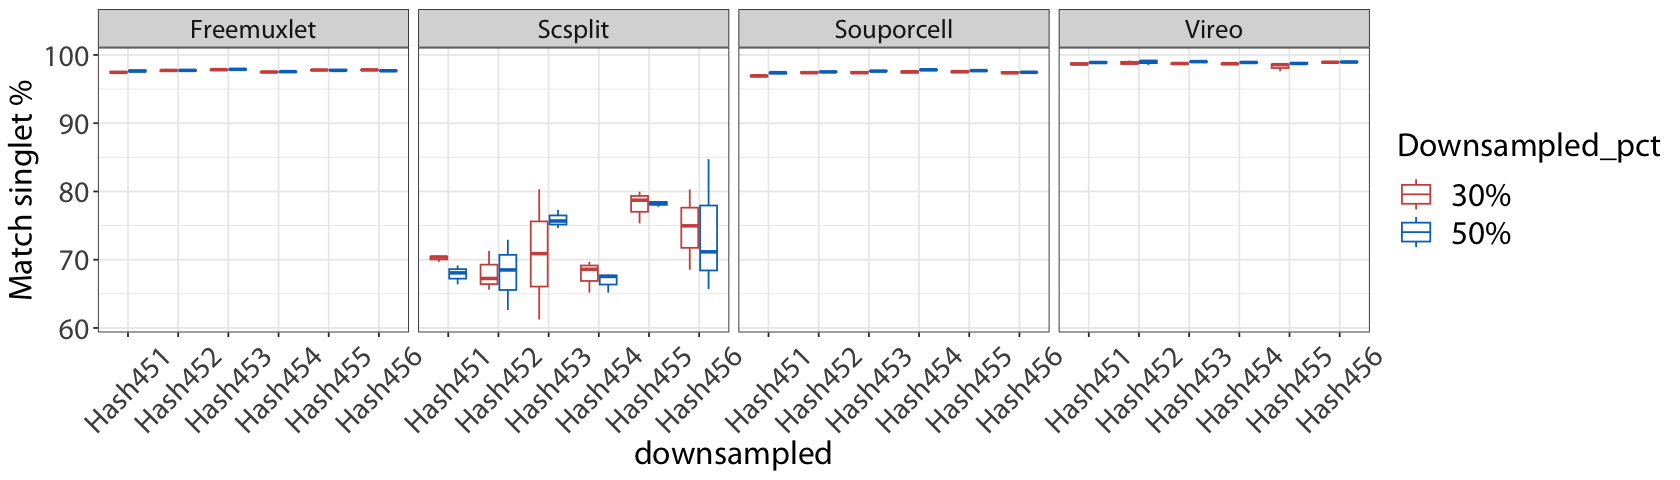

In [16]:
options(repr.plot.width = 14, repr.plot.height = 4)
ggplot(all_res, aes(x = downsampled, y = Percentage, color = Downsampled_pct)) +
    geom_boxplot() +
    theme_bw() +
    facet_grid(~Method) +
    ylab("Match singlet %") +
    scale_color_manual(
        values = c("#CD534CFF", "#0073C2FF")
    ) +
    theme(
        text = element_text(size = 20, family = "Myriad Pro"),
        axis.text = element_text(size = 18),
        axis.text.x = element_text(vjust = 0.5, angle = 45),
        axis.title = element_text(size = 20),
        legend.text = element_text(size = 20),
        legend.title = element_text(size = 20),
        legend.key.size = unit(0.8, "cm"),
        plot.title = element_text(size = 30, hjust = 0.5)
    )
ggsave("/Users/xichenwu/Downloads/hadge_revise/fig5/downsampled.pdf", dpi = 300, height = 4, width = 14)


In [17]:
hashing_all <- list.files(
    path = "../data/hashing_downsampling_1",
    pattern = "hashing_assignment_all.csv",
    all.files = TRUE,
    full.names = TRUE,
    recursive = TRUE
)
hashing_all


[1] "../data/hashing_downsampling_1/seed_27/hash_summary_30/hashing_assignment_all.csv"             
 [2] "../data/hashing_downsampling_1/seed_27/hash_summary_50/hash_summary/hashing_assignment_all.csv"
 [3] "../data/hashing_downsampling_1/seed_27/hash_summary_70/hashing_assignment_all.csv"             
 [4] "../data/hashing_downsampling_1/seed_32/hash_summary_30/hashing_assignment_all.csv"             
 [5] "../data/hashing_downsampling_1/seed_32/hash_summary_50/hashing_assignment_all.csv"             
 [6] "../data/hashing_downsampling_1/seed_32/hash_summary_70/hashing_assignment_all.csv"             
 [7] "../data/hashing_downsampling_1/seed_42/hash_summary_30/hashing_assignment_all.csv"             
 [8] "../data/hashing_downsampling_1/seed_42/hash_summary_50/hashing_assignment_all.csv"             
 [9] "../data/hashing_downsampling_1/seed_42/hash_summary_70/hashing_assignment_all.csv"             
[10] "../data/hashing_downsampling_1/seed_52/hash_summary_30/hashing_assignment_all.csv"             
[11] "../data/hashing_downsampling_1/seed_52/hash_summary_50/hashing_assignment_all.csv"             
[12] "../data/hashing_downsampling_1/seed_52/hash_summary_70/hashing_assignment_all.csv"             
[13] "../data/hashing_downsampling_1/seed_72/hash_summary_30/hashing_assignment_all.csv"             
[14] "../data/hashing_downsampling_1/seed_72/hash_summary_50/hashing_assignment_all.csv"             
[15] "../data/hashing_downsampling_1/seed_72/hash_summary_70/hashing_assignment_all.csv"

In [18]:
df_list <- lapply(hashing_all, function(f) {
    x <- read.csv(f, na.strings = "")
    x_bff <- x %>%
        filter(!is.na("bff_1")) %>%
        select(Barcode, bff_1)
    x <- x %>% select(-bff_1)
    x$Barcode <- paste0(x$Barcode, "-1")
    x <- inner_join(x, x_bff, by = "Barcode")
    x$seed <- str_extract(f, "(?<=seed_)[0-9]+")
    x$pct <- str_extract(f, "(?<=hash_summary_)[0-9]+")
    return(x)
})
compare <- rbindlist(df_list)


In [19]:
gt <- fread("../data/hashing_downsampling_1/GMM_assignment.csv")
compare <- inner_join(compare, gt, by = "Barcode")
colnames(compare)[10] <- "gt"
head(compare)


Barcode,hashsolo_1,hashedDrops_1,htodemux_1,multiseq_1,gmm_demux_1,bff_1,seed,pct,gt
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
CAACCAAGTACACCGC-1,HTO_1,1,HTO-1,HTO-1,HTO_1,HTO_1,27,30,HTO_1
GAATAAGTCACTGGGC-1,HTO_4,4,HTO-4,HTO-4,HTO_4,HTO_4,27,30,HTO_4
TTTGGTTCACAGCGTC-1,HTO_4,4,HTO-4,HTO-4,HTO_4,HTO_4,27,30,HTO_4
TGGTTCCAGTGACTCT-1,HTO_1,1,HTO-1,HTO-1,HTO_1,HTO_1,27,30,HTO_1
CCGTTCAGTCGCTTTC-1,HTO_3,3,HTO-3,HTO-3,HTO_3,HTO_3,27,30,HTO_3
CGAGAAGAGGGATGGG-1,HTO_2,2,HTO-2,HTO-2,HTO_2,HTO_2,27,30,HTO_2


In [20]:
hashing_res <- compare[!compare$gt %in% c("doublet", "negative"), ]
hashing_res$hashedDrops_1 <- paste0("HTO_", hashing_res$hashedDrops_1)
hashing_res$htodemux_1 <- gsub("-", "_", hashing_res$htodemux_1)
hashing_res$multiseq_1 <- gsub("-", "_", hashing_res$multiseq_1)


In [21]:
matching_tb <- hashing_res %>%
    mutate(across(-c(Barcode, gt, pct, seed), ~ .x == gt, .names = "match_{.col}")) %>%
    select(starts_with("match"))
matching_tb <- bind_cols(hashing_res[, c("Barcode", "pct", "seed")], matching_tb)


In [22]:
matching_tb_tf <- matching_tb %>%
    group_by(pct, seed) %>%
    summarise(across(starts_with("match"), ~ sum(.x) / length(.x[!is.na(.x)]) * 100), .groups = "drop")


In [23]:
matching_tb_tf <- melt(matching_tb_tf, id.vars = c("pct", "seed"), variable.name = "Method", value.name = "Count")
matching_tb_tf$Method <- gsub("match_", "", matching_tb_tf$Method)
matching_tb_tf$Method <- gsub("_1", "", matching_tb_tf$Method)


Warning message in melt(matching_tb_tf, id.vars = c("pct", "seed"), variable.name = "Method", :
"The melt generic in data.table has been passed a tbl_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(matching_tb_tf). In the next version, this warning will become an error."


In [29]:
hashing_all_sample2 <- list.files(
    path = "../data/hashing_downsampling_2",
    pattern = "hashing_assignment_all.csv",
    all.files = TRUE,
    full.names = TRUE,
    recursive = TRUE
)
hashing_all_sample2


[1] "../data/hashing_downsampling_2/seed_27/hash_summary_30/hashing_assignment_all.csv"
 [2] "../data/hashing_downsampling_2/seed_27/hash_summary_50/hashing_assignment_all.csv"
 [3] "../data/hashing_downsampling_2/seed_27/hash_summary_70/hashing_assignment_all.csv"
 [4] "../data/hashing_downsampling_2/seed_32/hash_summary_30/hashing_assignment_all.csv"
 [5] "../data/hashing_downsampling_2/seed_32/hash_summary_50/hashing_assignment_all.csv"
 [6] "../data/hashing_downsampling_2/seed_32/hash_summary_70/hashing_assignment_all.csv"
 [7] "../data/hashing_downsampling_2/seed_42/hash_summary_30/hashing_assignment_all.csv"
 [8] "../data/hashing_downsampling_2/seed_42/hash_summary_50/hashing_assignment_all.csv"
 [9] "../data/hashing_downsampling_2/seed_42/hash_summary_70/hashing_assignment_all.csv"
[10] "../data/hashing_downsampling_2/seed_72/hash_summary_30/hashing_assignment_all.csv"
[11] "../data/hashing_downsampling_2/seed_72/hash_summary_50/hashing_assignment_all.csv"
[12] "../data/hashing_downsampling_2/seed_72/hash_summary_70/hashing_assignment_all.csv"
[13] "../data/hashing_downsampling_2/seed_96/hash_summary_30/hashing_assignment_all.csv"
[14] "../data/hashing_downsampling_2/seed_96/hash_summary_50/hashing_assignment_all.csv"
[15] "../data/hashing_downsampling_2/seed_96/hash_summary_70/hashing_assignment_all.csv"

In [30]:
df_list_sample2 <- lapply(hashing_all_sample2, function(f) {
    x <- read.csv(f, na.strings = "")
    x_bff <- x %>%
        filter(!is.na("bff_1")) %>%
        select(Barcode, bff_1)
    x <- x %>% select(-bff_1)
    x$Barcode <- paste0(x$Barcode, "-1")
    x <- inner_join(x, x_bff, by = "Barcode")
    x$seed <- str_extract(f, "(?<=seed_)[0-9]+")
    x$pct <- str_extract(f, "(?<=hash_summary_)[0-9]+")
    return(x)
})
compare_sample2 <- rbindlist(df_list_sample2)


In [31]:
gt_sample2 <- fread("../data/hashing_downsampling_2/cell_hash_r.csv")
gt_sample2$Barcode <- paste0(gt_sample2$cellbarcode, "-1")
compare_sample2 <- inner_join(compare_sample2, gt_sample2[, c("Barcode", "bff_cluster")], by = "Barcode")
colnames(compare_sample2)[8] <- "gt"
head(compare_sample2)


Barcode,hashsolo_1,hashedDrops_1,demuxem_1,bff_1,seed,pct,gt
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
AGCGTCGTCAGAAATG-1,negative,2,MS-12,MS-12,27,30,MS-12
GTGCTTCGTCTCATCC-1,negative,doublet,MS-12,negative,27,30,MS-12
CCTTCGAAGGTGATTA-1,negative,doublet,doublet,negative,27,30,Negative
CGGGTCAAGTCACGCC-1,negative,1,MS-11,MS-11,27,30,MS-11
AGCATACAGAGACGAA-1,negative,2,MS-12,MS-12,27,30,MS-12
TATTACCTCAGCAACT-1,negative,1,MS-11,MS-11,27,30,MS-11


In [32]:
compare_sample2 %>%
    group_by(pct, seed) %>%
    summarise(unique_values = list(unique(hashedDrops_1)), .groups = "drop")


pct,seed,unique_values
<chr>,<chr>,<list>
30,27,"2 , doublet, 1"
30,32,"2 , doublet, 1"
30,42,"2 , doublet, 1"
30,72,"2 , doublet, 1"
30,96,"doublet, 2 , 1"
50,27,"12 , negative, 11 , doublet"
50,32,"12 , negative, doublet , 11"
50,42,"12 , negative, 11 , doublet"
50,72,"12 , negative, 11 , doublet"


In [33]:
compare_sample2$hashsolo_1 <- gsub("-GGACCCCA", "", compare_sample2$hashsolo_1)
compare_sample2$hashsolo_1 <- gsub("-TTAGCCAG", "", compare_sample2$hashsolo_1)

compare_sample2$hashedDrops_1 <- gsub("-GGACCCCA", "", compare_sample2$hashedDrops_1)
compare_sample2$hashedDrops_1 <- gsub("-TTAGCCAG", "", compare_sample2$hashedDrops_1)

compare_sample2$demuxem_1 <- gsub("-GGACCCCA", "", compare_sample2$demuxem_1)
compare_sample2$demuxem_1 <- gsub("-TTAGCCAG", "", compare_sample2$demuxem_1)

compare_sample2$hashedDrops_1[compare_sample2$hashedDrops_1 == "12"] <- "MS-12"
compare_sample2$hashedDrops_1[compare_sample2$hashedDrops_1 == "11"] <- "MS-11"
compare_sample2$hashedDrops_1[compare_sample2$hashedDrops_1 == "1"] <- "MS-11"
compare_sample2$hashedDrops_1[compare_sample2$hashedDrops_1 == "2"] <- "MS-12"


In [35]:
hashing_res_2 <- compare_sample2[!compare_sample2$gt %in% c("doublet", "negative"), ]
nrow(hashing_res_2)
hashing_res_2 %>% filter(rowSums(is.na(.)) > 0)


[1] 83160

Barcode,hashsolo_1,hashedDrops_1,demuxem_1,bff_1,seed,pct,gt
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
GCTTCCAAGAGTCGGT-1,negative,doublet,NA,MS-11,27,30,MS-11
GACAGAGCATGCCTAA-1,negative,doublet,NA,negative,27,30,Doublet
CCGTTCATCATGTCTT-1,negative,MS-12,NA,MS-12,32,30,MS-12
CATATGGAGGAATCGC-1,negative,doublet,NA,negative,32,30,MS-11
GACAGAGCATGCCTAA-1,negative,doublet,NA,negative,32,30,Doublet
CCGTTCATCATGTCTT-1,negative,MS-12,NA,MS-12,42,30,MS-12
TACGGTAAGAAGGACA-1,negative,doublet,NA,negative,42,30,Doublet
GCGGGTTAGGCTCAGA-1,negative,MS-11,NA,MS-11,42,30,MS-11
TGCTGCTGTTGGACCC-1,negative,doublet,NA,negative,42,30,MS-11


In [36]:
matching_tb_2 <- hashing_res_2 %>%
    mutate(across(-c(Barcode, gt, pct, seed), ~ .x == gt, .names = "match_{.col}")) %>%
    select(starts_with("match"))
matching_tb_2$match_demuxem_1[is.na(matching_tb_2$match_demuxem_1)] <- FALSE
matching_tb_2 <- bind_cols(hashing_res_2[, c("Barcode", "pct", "seed")], matching_tb_2)


In [38]:
matching_tb_tf_2 <- matching_tb_2 %>%
    group_by(pct, seed) %>%
    summarise(across(starts_with("match"), ~ sum(.x) / length(.x[!is.na(.x)]) * 100), .groups = "drop")
matching_tb_tf_2 <- melt(matching_tb_tf_2, id.vars = c("pct", "seed"), variable.name = "Method", value.name = "Count")
matching_tb_tf_2$Method <- gsub("match_", "", matching_tb_tf_2$Method)
matching_tb_tf_2$Method <- gsub("_1", "", matching_tb_tf_2$Method)
matching_tb_tf_2 <- matching_tb_tf_2[matching_tb_tf_2$Method == "demuxem", ]


Warning message in melt(matching_tb_tf_2, id.vars = c("pct", "seed"), variable.name = "Method", :
"The melt generic in data.table has been passed a tbl_df and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(matching_tb_tf_2). In the next version, this warning will become an error."


In [39]:
matching_tb_tf$dataset <- "PBMC"
matching_tb_tf_2$dataset <- "CR-438-21"
matching_tb_tf_all <- rbind(matching_tb_tf, matching_tb_tf_2)
matching_tb_tf_all$dataset <- factor(matching_tb_tf_all$dataset, levels = c("PBMC", "CR-438-21"))


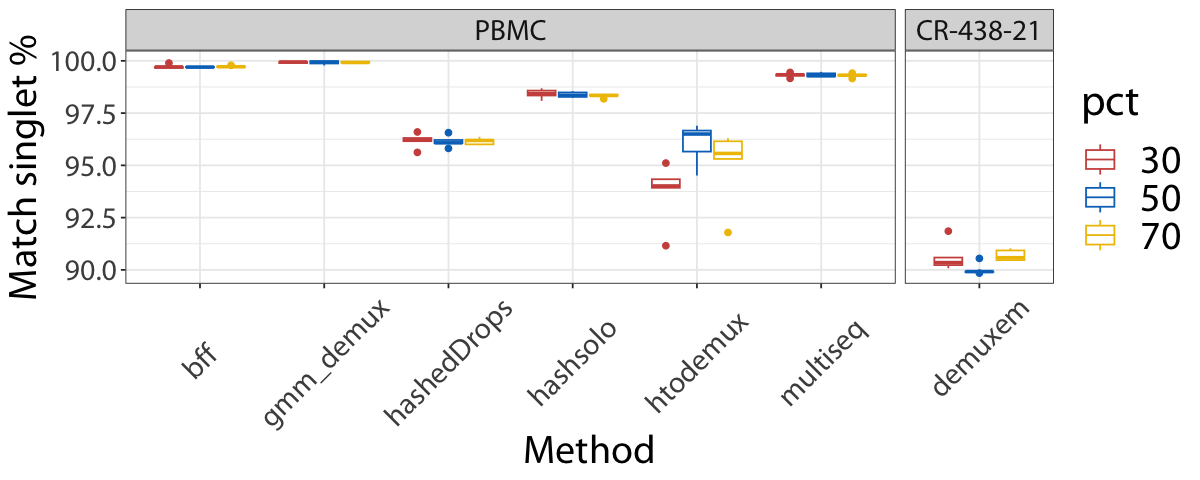

In [41]:
options(repr.plot.width = 10, repr.plot.height = 4)
ggplot(matching_tb_tf_all, aes(x = Method, y = Count, color = pct)) +
    geom_boxplot() +
    facet_grid(. ~ dataset, scales = "free", space = "free") +
    theme_bw() +
    ylab("Match singlet %") +
    scale_color_manual(
        values = c("#CD534CFF", "#0073C2FF", "#EFC000FF")
    ) +
    theme(
        text = element_text(size = 22, family = "Myriad Pro"),
        axis.text = element_text(size = 18),
        axis.text.x = element_text(vjust = 0.5, angle = 45),
        axis.title = element_text(size = 24),
        legend.text = element_text(size = 24),
        legend.title = element_text(size = 26),
        legend.key.size = unit(0.8, "cm"),
        plot.title = element_text(size = 30, hjust = 0.5)
    )
